# Setup

In [1]:
# import your standard packages
%run ../pkgs.py
%run ../pars.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Parameters and Paths

In [2]:
inpath = '../../data/wod_processed.nc'
outfn = '../../data/wod_coastal_processed.nc'

ds_out = xr.Dataset()

# Get Data

In [3]:
ds_WOD = xr.open_dataset(inpath)
ds_WOD

<xarray.Dataset>
Dimensions:           (pres: 57, time: 319845)
Coordinates:
  * time              (time) datetime64[ns] 1948-03-14 1948-03-28 ... 2020-05-31
  * pres              (pres) int64 0 5 10 15 20 25 ... 1300 1350 1400 1450 1500
Data variables:
    temp              (time, pres) float64 ...
    sal               (time, pres) float64 ...
    doxy              (time, pres) float64 ...
    nitrate           (time, pres) float64 ...
    phosphate         (time, pres) float64 ...
    lat               (time) float32 ...
    lon               (time) float32 ...
    cast_id           (time) object ...
    temp_40_200       (time) float64 ...
    doxy_40_200       (time) float64 ...
    sal_40_200        (time) float64 ...
    nitrate_40_200    (time) float64 ...
    phosphate_40_200  (time) float64 ...
    temp_50_200       (time) float64 ...
    doxy_50_200       (time) float64 ...
    sal_50_200        (time) float64 ...
    nitrate_50_200    (time) float64 ...
    phosphate_50_200

In [4]:
ds_mask = xr.open_dataset('../../data/coastal_mask.nc')
ds_mask

<xarray.Dataset>
Dimensions:         (lat: 138, lat_ro: 138, lat_woa: 35, loc_wod: 319845, loc_wod18: 299294, lon: 226, lon_ro: 216, lon_woa: 55)
Coordinates:
  * lat             (lat) float64 -1.5 -1.25 -1.0 -0.75 ... 32.25 32.5 32.75
  * lon             (lon) float64 48.5 48.75 49.0 49.25 ... 104.2 104.5 104.8
  * lat_ro          (lat_ro) float64 -1.375 -1.125 -0.875 ... 32.38 32.62 32.88
  * lon_ro          (lon_ro) float64 48.62 48.88 49.12 ... 101.9 102.1 102.4
  * lat_woa         (lat_woa) float32 -1.5 -0.5 0.5 1.5 ... 29.5 30.5 31.5 32.5
  * lon_woa         (lon_woa) float32 48.5 49.5 50.5 51.5 ... 100.5 101.5 102.5
  * loc_wod         (loc_wod) int64 0 1 2 3 4 ... 319841 319842 319843 319844
  * loc_wod18       (loc_wod18) int64 0 1 2 3 4 ... 299290 299291 299292 299293
Data variables:
    mask            (lat, lon) float64 ...
    maskw           (lat, lon) float64 ...
    maskw_ro        (lat_ro, lon_ro) int64 ...
    maskn           (lat, lon) float64 ...
    maskw_woa      

# Find Coastal Mask Data


# 50-200

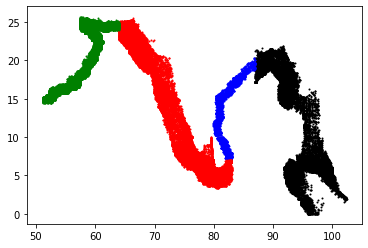

In [17]:
depth = '50_200'
pres = ds_WOD.pres
sal = ds_WOD['sal_' + depth]
temp = ds_WOD['temp_' + depth]
doxy = ds_WOD['doxy_' + depth]
doxy_pr = ds_WOD['doxy']
temp_pr = ds_WOD['temp']
sal_pr = ds_WOD['sal']
nitrate = ds_WOD['nitrate_' + depth]
phosphate = ds_WOD['phosphate_' + depth]

#############################################################
#----------------- Western Arabian Sea ---------------------#
#############################################################

ind_wAS = ((ds_WOD.lon <= bounds_wAS[1]) & (ds_WOD.lon >= bounds_wAS[0]) & 
              (ds_WOD.lat <= bounds_wAS[3]) & (ds_WOD.lat >= bounds_wAS[2]))

#subset gridded data
temp_wAS = temp[ind_wAS]
temp_pr_wAS = temp_pr[ind_wAS]
sal_wAS = sal[ind_wAS]
sal_pr_wAS = sal_pr[ind_wAS]
doxy_wAS = doxy[ind_wAS]
doxy_pr_wAS = doxy_pr[ind_wAS,:]
nitrate_wAS = nitrate[ind_wAS]
phosphate_wAS = phosphate[ind_wAS]
lat_wAS = ds_WOD.lat[ind_wAS]
lon_wAS = ds_WOD.lon[ind_wAS]
time_wAS = ds_WOD.time[ind_wAS]
mon_wAS = time_wAS.dt.month
mask_wAS = np.array(ds_mask.maskn_wod)[ind_wAS]
    
# convert to coastal
temp_wAS = temp_wAS[mask_wAS]
temp_pr_wAS = temp_pr_wAS[mask_wAS,:]
sal_wAS = sal_wAS[mask_wAS]
sal_pr_wAS = sal_pr_wAS[mask_wAS,:]
doxy_wAS = doxy_wAS[mask_wAS]
doxy_pr_wAS = doxy_pr_wAS[mask_wAS,:]
nitrate_wAS = nitrate_wAS[mask_wAS]
phosphate_wAS = phosphate_wAS[mask_wAS]
lat_wAS = lat_wAS[mask_wAS]
lon_wAS = lon_wAS[mask_wAS]
time_wAS = time_wAS[mask_wAS]
mon_wAS = mon_wAS[mask_wAS]

seas_wAS = np.full(mon_wAS.shape,0)
ind = (mon_wAS == 6) | (mon_wAS == 7) | (mon_wAS == 8) | (mon_wAS == 9) | (mon_wAS == 10)| (mon_wAS == 11)
seas_wAS[ind] = 1
#############################################################
#----------------- Eastern Arabian Sea ---------------------#
#############################################################

ind_eAS = ((ds_WOD.lon <= bounds_eAS[1]) & (ds_WOD.lon >= bounds_eAS[0]) & 
              (ds_WOD.lat <= bounds_eAS[3]) & (ds_WOD.lat >= bounds_eAS[2])) 
ind_eAS_SL = ((ds_WOD.lon < bounds_eAS_SL[1]) & (ds_WOD.lon > bounds_eAS_SL[0]) & 
              (ds_WOD.lat < bounds_eAS_SL[3]) & (ds_WOD.lat > bounds_eAS_SL[2])) 

#subset gridded data
temp_eAS = xr.concat((temp[ind_eAS],temp[ind_eAS_SL]), dim = 'time')
temp_pr_eAS = xr.concat((temp_pr[ind_eAS,:],temp_pr[ind_eAS_SL,:]), dim = 'time')
sal_eAS = xr.concat((sal[ind_eAS],sal[ind_eAS_SL]), dim = 'time')
sal_pr_eAS = xr.concat((sal_pr[ind_eAS,:],sal_pr[ind_eAS_SL,:]), dim = 'time')
doxy_eAS = xr.concat((doxy[ind_eAS],doxy[ind_eAS_SL]), dim = 'time')
doxy_pr_eAS = xr.concat((doxy_pr[ind_eAS,:],doxy_pr[ind_eAS_SL,:]), dim = 'time')
nitrate_eAS = xr.concat((nitrate[ind_eAS],nitrate[ind_eAS_SL]), dim = 'time')
phosphate_eAS = xr.concat((phosphate[ind_eAS],phosphate[ind_eAS_SL]), dim = 'time')
lat_eAS = xr.concat((ds_WOD.lat[ind_eAS],ds_WOD.lat[ind_eAS_SL]), dim = 'time')
lon_eAS = xr.concat((ds_WOD.lon[ind_eAS],ds_WOD.lon[ind_eAS_SL]), dim = 'time')
time_eAS = temp_eAS.time
mon_eAS = time_eAS.dt.month
mask_eAS = np.array(ds_mask.maskw_ro_wod)
mask_eAS = np.concatenate((mask_eAS[ind_eAS],mask_eAS[ind_eAS_SL]),0)

# temp_eAS = temp[ind_eAS]
# doxy_eAS = doxy[ind_eAS]
# nitrate_eAS = nitrate[ind_eAS]
# phosphate_eAS = phosphate[ind_eAS]
# lat_eAS = ds_WOD.lat[ind_eAS]
# lon_eAS = ds_WOD.lon[ind_eAS]
# time_eAS = ds_WOD.time[ind_eAS]
# mon_eAS = time_eAS.dt.month
# mask_eAS = np.array(ds_mask.maskw_ro_wod)[ind_eAS]
    
# convert to coastal
temp_eAS = temp_eAS[mask_eAS]
temp_pr_eAS = temp_pr_eAS[mask_eAS,:]
sal_eAS = sal_eAS[mask_eAS]
sal_pr_eAS = sal_pr_eAS[mask_eAS,:]
doxy_eAS = doxy_eAS[mask_eAS]
doxy_pr_eAS = doxy_pr_eAS[mask_eAS,:]
phosphate_eAS = phosphate_eAS[mask_eAS]
nitrate_eAS = nitrate_eAS[mask_eAS]
lat_eAS = lat_eAS[mask_eAS]
lon_eAS = lon_eAS[mask_eAS]
time_eAS = time_eAS[mask_eAS]
mon_eAS = mon_eAS[mask_eAS]

# sort by time
temp_eAS = temp_eAS.sortby(time_eAS)
temp_pr_eAS = temp_pr_eAS.sortby(time_eAS)
sal_eAS = sal_eAS.sortby(time_eAS)
sal_pr_eAS = sal_pr_eAS.sortby(time_eAS)
doxy_eAS = doxy_eAS.sortby(time_eAS)
doxy_pr_eAS = doxy_pr_eAS.sortby(time_eAS)
phosphate_eAS = phosphate_eAS.sortby(time_eAS)
nitrate_eAS = nitrate_eAS.sortby(time_eAS)
lat_eAS = lat_eAS.sortby(time_eAS)
lon_eAS = lon_eAS.sortby(time_eAS)
mon_eAS = mon_eAS.sortby(time_eAS)
time_eAS = time_eAS.sortby(time_eAS)

seas_eAS = np.full(mon_eAS.shape,0)
ind = (mon_eAS == 6) | (mon_eAS == 7) | (mon_eAS == 8) | (mon_eAS == 9) | (mon_eAS == 10)| (mon_eAS == 11)
seas_eAS[ind] = 1

#############################################################
#---------------- Western Bay of Bengal --------------------#
#############################################################

ind_wBoB = ((ds_WOD.lon <= bounds_wBoB[1]) & (ds_WOD.lon >= bounds_wBoB[0]) & 
               (ds_WOD.lat <= bounds_wBoB[3]) & (ds_WOD.lat >= bounds_wBoB[2])) 
ind_wBoB_SL = ((ds_WOD.lon < bounds_wBoB_SL[1]) & (ds_WOD.lon > bounds_wBoB_SL[0]) & 
              (ds_WOD.lat < bounds_wBoB_SL[3]) & (ds_WOD.lat > bounds_wBoB_SL[2])) 

#subset gridded data
temp_wBoB = xr.concat((temp[ind_wBoB],temp[ind_wBoB_SL]), dim = 'time')
temp_pr_wBoB = xr.concat((temp_pr[ind_wBoB,:],temp_pr[ind_wBoB_SL,:]), dim = 'time')
sal_wBoB = xr.concat((sal[ind_wBoB],sal[ind_wBoB_SL]), dim = 'time')
sal_pr_wBoB = xr.concat((sal_pr[ind_wBoB,:],sal_pr[ind_wBoB_SL,:]), dim = 'time')
doxy_wBoB = xr.concat((doxy[ind_wBoB],doxy[ind_wBoB_SL]), dim = 'time')
doxy_pr_wBoB = xr.concat((doxy_pr[ind_wBoB,:],doxy_pr[ind_wBoB_SL,:]), dim = 'time')
nitrate_wBoB = xr.concat((nitrate[ind_wBoB],nitrate[ind_wBoB_SL]), dim = 'time')
phosphate_wBoB = xr.concat((phosphate[ind_wBoB],phosphate[ind_wBoB_SL]), dim = 'time')
lat_wBoB = xr.concat((ds_WOD.lat[ind_wBoB],ds_WOD.lat[ind_wBoB_SL]), dim = 'time')
lon_wBoB = xr.concat((ds_WOD.lon[ind_wBoB],ds_WOD.lon[ind_wBoB_SL]), dim = 'time')
time_wBoB = temp_wBoB.time
mon_wBoB = time_wBoB.dt.month
mask_wBoB = np.array(ds_mask.maskn_wod)
mask_wBoB = np.concatenate((mask_wBoB[ind_wBoB],mask_wBoB[ind_wBoB_SL]),0)

# temp_wBoB = temp[ind_wBoB]
# doxy_wBoB = doxy[ind_wBoB]
# nitrate_wBoB = nitrate[ind_wBoB]
# phosphate_wBoB = phosphate[ind_wBoB]
# lat_wBoB = ds_WOD.lat[ind_wBoB]
# lon_wBoB = ds_WOD.lon[ind_wBoB]
# time_wBoB = ds_WOD.time[ind_wBoB]
# mon_wBoB = time_wBoB.dt.month
# mask_wBoB = np.array(ds_mask.maskn_wod)[ind_wBoB]
    
# convert to coastal
temp_wBoB = temp_wBoB[mask_wBoB]
temp_pr_wBoB = temp_pr_wBoB[mask_wBoB,:]
sal_wBoB = sal_wBoB[mask_wBoB]
sal_pr_wBoB = sal_pr_wBoB[mask_wBoB,:]
doxy_wBoB = doxy_wBoB[mask_wBoB]
doxy_pr_wBoB = doxy_pr_wBoB[mask_wBoB,:]
nitrate_wBoB = nitrate_wBoB[mask_wBoB]
phosphate_wBoB = phosphate_wBoB[mask_wBoB]
lat_wBoB = lat_wBoB[mask_wBoB]
lon_wBoB = lon_wBoB[mask_wBoB]
time_wBoB = time_wBoB[mask_wBoB]
mon_wBoB = mon_wBoB[mask_wBoB]

# sort by time
temp_wBoB = temp_wBoB.sortby(time_wBoB)
temp_pr_wBoB = temp_pr_wBoB.sortby(time_wBoB)
sal_wBoB = sal_wBoB.sortby(time_wBoB)
sal_pr_wBoB = sal_pr_wBoB.sortby(time_wBoB)
doxy_wBoB = doxy_wBoB.sortby(time_wBoB)
doxy_pr_wBoB = doxy_pr_wBoB.sortby(time_wBoB)
nitrate_wBoB = nitrate_wBoB.sortby(time_wBoB)
phosphate_wBoB = phosphate_wBoB.sortby(time_wBoB)
lat_wBoB = lat_wBoB.sortby(time_wBoB)
lon_wBoB = lon_wBoB.sortby(time_wBoB)
mon_wBoB = mon_wBoB.sortby(time_wBoB)
time_wBoB = time_wBoB.sortby(time_wBoB)

seas_wBoB = np.full(mon_wBoB.shape,0)
ind = (mon_wBoB == 6) | (mon_wBoB == 7) | (mon_wBoB == 8) | (mon_wBoB == 9) | (mon_wBoB == 10)| (mon_wBoB == 11)
seas_wBoB[ind] = 1

#############################################################
#---------------- Eastern Bay of Bengal --------------------#
#############################################################

ind_eBoB = ((ds_WOD.lon <= bounds_eBoB[1]) & (ds_WOD.lon >= bounds_eBoB[0]) & 
               (ds_WOD.lat <= bounds_eBoB[3]) & (ds_WOD.lat >= bounds_eBoB[2])) 

#subset gridded data
temp_eBoB = temp[ind_eBoB]
temp_pr_eBoB = temp_pr[ind_eBoB,:]
sal_eBoB = sal[ind_eBoB]
sal_pr_eBoB = sal_pr[ind_eBoB,:]
doxy_eBoB = doxy[ind_eBoB]
doxy_pr_eBoB = doxy_pr[ind_eBoB,:]
nitrate_eBoB = nitrate[ind_eBoB]
phosphate_eBoB = phosphate[ind_eBoB]
lat_eBoB = ds_WOD.lat[ind_eBoB]
lon_eBoB = ds_WOD.lon[ind_eBoB]
time_eBoB = ds_WOD.time[ind_eBoB]
mon_eBoB = time_eBoB.dt.month
mask_eBoB = np.array(ds_mask.maskw_ro_wod)[ind_eBoB]

# convert to coastal
temp_eBoB = temp_eBoB[mask_eBoB]
temp_pr_eBoB = temp_pr_eBoB[mask_eBoB,:]
sal_eBoB = sal_eBoB[mask_eBoB]
sal_pr_eBoB = sal_pr_eBoB[mask_eBoB,:]
doxy_eBoB = doxy_eBoB[mask_eBoB]
doxy_pr_eBoB = doxy_pr_eBoB[mask_eBoB,:]
nitrate_eBoB =  nitrate_eBoB[mask_eBoB]
phosphate_eBoB =  phosphate_eBoB[mask_eBoB]
lat_eBoB = lat_eBoB[mask_eBoB]
lon_eBoB = lon_eBoB[mask_eBoB]
time_eBoB = time_eBoB[mask_eBoB]
mon_eBoB = mon_eBoB[mask_eBoB]

seas_eBoB = np.full(mon_eBoB.shape,0)
ind = (mon_eBoB == 6) | (mon_eBoB == 7) | (mon_eBoB == 8) | (mon_eBoB == 9) | (mon_eBoB == 10)| (mon_eBoB == 11)
seas_eBoB[ind] = 1

#############################################################
#---------------------- Solubility -------------------------#
#############################################################

#seasonal 
O2_sat_wAS = o2sat(temp_wAS,sal_wAS)
O2_sat_eAS = o2sat(temp_eAS,sal_eAS)
O2_sat_wBoB = o2sat(temp_wBoB,sal_wBoB)
O2_sat_eBoB = o2sat(temp_eBoB,sal_eBoB)

#############################################################
#---------------------- Scatter --------------------------#
#############################################################
plt.scatter(lon_eBoB,lat_eBoB,color = 'k', s = 1)
plt.scatter(lon_wBoB,lat_wBoB,color = 'b', s = 1)
plt.scatter(lon_eAS,lat_eAS,color = 'r', s = 1)
plt.scatter(lon_wAS,lat_wAS,color = 'g', s = 1)

#############################################################
#---------------------- Save Data --------------------------#
#############################################################
ds_out['lat_wAS'] = xr.DataArray(lat_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['lon_wAS'] = xr.DataArray(lon_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['mon_wAS'] = xr.DataArray(mon_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['seas_wAS'] = xr.DataArray(seas_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['lat_eAS'] = xr.DataArray(lat_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['lon_eAS'] = xr.DataArray(lon_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['mon_eAS'] = xr.DataArray(mon_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['seas_eAS'] = xr.DataArray(seas_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['lat_wBoB'] = xr.DataArray(lat_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['lon_wBoB'] = xr.DataArray(lon_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['mon_wBoB'] = xr.DataArray(mon_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['seas_wBoB'] = xr.DataArray(seas_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['lat_eBoB'] = xr.DataArray(lat_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['lon_eBoB'] = xr.DataArray(lon_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['mon_eBoB'] = xr.DataArray(mon_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['seas_eBoB'] = xr.DataArray(seas_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])

# Western Arabian Sea
ds_out['temp_wAS'] = xr.DataArray(temp_pr_wAS,dims = ['time_wAS','pres'],coords =[time_wAS,pres])
ds_out['sal_wAS'] = xr.DataArray(sal_pr_wAS,dims = ['time_wAS','pres'],coords =[time_wAS,pres])
ds_out['doxy_wAS'] = xr.DataArray(doxy_pr_wAS,dims = ['time_wAS','pres'],coords =[time_wAS,pres])
ds_out['temp_wAS_' + depth] = xr.DataArray(temp_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['sal_wAS_' + depth] = xr.DataArray(sal_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['doxy_wAS_' + depth] = xr.DataArray(doxy_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['nitrate_wAS_' + depth] = xr.DataArray(nitrate_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['phosphate_wAS_' + depth] = xr.DataArray(phosphate_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['O2_sat_wAS_' + depth] = xr.DataArray(O2_sat_wAS,dims = ['time_wAS'],coords =[time_wAS])

# Eastern Arabian Sea
ds_out['temp_eAS'] = xr.DataArray(temp_pr_eAS,dims = ['time_eAS','pres'],coords =[time_eAS,pres])
ds_out['sal_eAS'] = xr.DataArray(sal_pr_eAS,dims = ['time_eAS','pres'],coords =[time_eAS,pres])
ds_out['doxy_eAS'] = xr.DataArray(doxy_pr_eAS,dims = ['time_eAS','pres'],coords =[time_eAS,pres])
ds_out['temp_eAS_' + depth] = xr.DataArray(temp_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['sal_eAS_' + depth] = xr.DataArray(sal_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['doxy_eAS_' + depth] = xr.DataArray(doxy_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['nitrate_eAS_' + depth] = xr.DataArray(nitrate_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['phosphate_eAS_' + depth] = xr.DataArray(phosphate_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['O2_sat_eAS_' + depth] = xr.DataArray(O2_sat_eAS,dims = ['time_eAS'],coords =[time_eAS])

# Western Bay of Bengal
ds_out['temp_wBoB'] = xr.DataArray(temp_pr_wBoB,dims = ['time_wBoB','pres'],coords =[time_wBoB,pres])
ds_out['sal_wBoB'] = xr.DataArray(sal_pr_wBoB,dims = ['time_wBoB','pres'],coords =[time_wBoB,pres])
ds_out['doxy_wBoB'] = xr.DataArray(doxy_pr_wBoB,dims = ['time_wBoB','pres'],coords =[time_wBoB,pres])
ds_out['temp_wBoB_' + depth] = xr.DataArray(temp_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['tsal_wBoB_' + depth] = xr.DataArray(sal_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['doxy_wBoB_' + depth] = xr.DataArray(doxy_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['nitrate_wBoB_' + depth] = xr.DataArray(nitrate_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['phosphate_wBoB_' + depth] = xr.DataArray(phosphate_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['O2_sat_wBoB_' + depth] = xr.DataArray(O2_sat_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])

# Eastern Bay of Bengal
ds_out['temp_eBoB'] = xr.DataArray(temp_pr_eBoB,dims = ['time_eBoB','pres'],coords =[time_eBoB,pres])
ds_out['sal_eBoB'] = xr.DataArray(sal_pr_eBoB,dims = ['time_eBoB','pres'],coords =[time_eBoB,pres])
ds_out['doxy_eBoB'] = xr.DataArray(doxy_pr_eBoB,dims = ['time_eBoB','pres'],coords =[time_eBoB,pres])
ds_out['temp_eBoB_' + depth] = xr.DataArray(temp_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['sal_eBoB_' + depth] = xr.DataArray(sal_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['doxy_eBoB_' + depth] = xr.DataArray(doxy_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['nitrate_eBoB_' + depth] = xr.DataArray(nitrate_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['phosphate_eBoB_' + depth] = xr.DataArray(phosphate_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['O2_sat_eBoB_' + depth] = xr.DataArray(O2_sat_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])


## 40-200

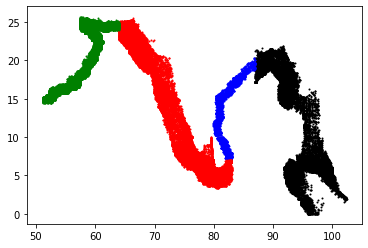

In [18]:
depth = '40_200'
pres = ds_WOD.pres
sal = ds_WOD['sal_' + depth]
temp = ds_WOD['temp_' + depth]
doxy = ds_WOD['doxy_' + depth]
doxy_pr = ds_WOD['doxy']
temp_pr = ds_WOD['temp']
sal_pr = ds_WOD['sal']
nitrate = ds_WOD['nitrate_' + depth]
phosphate = ds_WOD['phosphate_' + depth]

#############################################################
#----------------- Western Arabian Sea ---------------------#
#############################################################

ind_wAS = ((ds_WOD.lon <= bounds_wAS[1]) & (ds_WOD.lon >= bounds_wAS[0]) & 
              (ds_WOD.lat <= bounds_wAS[3]) & (ds_WOD.lat >= bounds_wAS[2]))

#subset gridded data
temp_wAS = temp[ind_wAS]
temp_pr_wAS = temp_pr[ind_wAS]
sal_wAS = sal[ind_wAS]
sal_pr_wAS = sal_pr[ind_wAS]
doxy_wAS = doxy[ind_wAS]
doxy_pr_wAS = doxy_pr[ind_wAS,:]
nitrate_wAS = nitrate[ind_wAS]
phosphate_wAS = phosphate[ind_wAS]
lat_wAS = ds_WOD.lat[ind_wAS]
lon_wAS = ds_WOD.lon[ind_wAS]
time_wAS = ds_WOD.time[ind_wAS]
mon_wAS = time_wAS.dt.month
mask_wAS = np.array(ds_mask.maskn_wod)[ind_wAS]
    
# convert to coastal
temp_wAS = temp_wAS[mask_wAS]
temp_pr_wAS = temp_pr_wAS[mask_wAS,:]
sal_wAS = sal_wAS[mask_wAS]
sal_pr_wAS = sal_pr_wAS[mask_wAS,:]
doxy_wAS = doxy_wAS[mask_wAS]
doxy_pr_wAS = doxy_pr_wAS[mask_wAS,:]
nitrate_wAS = nitrate_wAS[mask_wAS]
phosphate_wAS = phosphate_wAS[mask_wAS]
lat_wAS = lat_wAS[mask_wAS]
lon_wAS = lon_wAS[mask_wAS]
time_wAS = time_wAS[mask_wAS]
mon_wAS = mon_wAS[mask_wAS]

seas_wAS = np.full(mon_wAS.shape,0)
ind = (mon_wAS == 6) | (mon_wAS == 7) | (mon_wAS == 8) | (mon_wAS == 9) | (mon_wAS == 10)| (mon_wAS == 11)
seas_wAS[ind] = 1
#############################################################
#----------------- Eastern Arabian Sea ---------------------#
#############################################################

ind_eAS = ((ds_WOD.lon <= bounds_eAS[1]) & (ds_WOD.lon >= bounds_eAS[0]) & 
              (ds_WOD.lat <= bounds_eAS[3]) & (ds_WOD.lat >= bounds_eAS[2])) 
ind_eAS_SL = ((ds_WOD.lon < bounds_eAS_SL[1]) & (ds_WOD.lon > bounds_eAS_SL[0]) & 
              (ds_WOD.lat < bounds_eAS_SL[3]) & (ds_WOD.lat > bounds_eAS_SL[2])) 

#subset gridded data
temp_eAS = xr.concat((temp[ind_eAS],temp[ind_eAS_SL]), dim = 'time')
temp_pr_eAS = xr.concat((temp_pr[ind_eAS,:],temp_pr[ind_eAS_SL,:]), dim = 'time')
sal_eAS = xr.concat((sal[ind_eAS],sal[ind_eAS_SL]), dim = 'time')
sal_pr_eAS = xr.concat((sal_pr[ind_eAS,:],sal_pr[ind_eAS_SL,:]), dim = 'time')
doxy_eAS = xr.concat((doxy[ind_eAS],doxy[ind_eAS_SL]), dim = 'time')
doxy_pr_eAS = xr.concat((doxy_pr[ind_eAS,:],doxy_pr[ind_eAS_SL,:]), dim = 'time')
nitrate_eAS = xr.concat((nitrate[ind_eAS],nitrate[ind_eAS_SL]), dim = 'time')
phosphate_eAS = xr.concat((phosphate[ind_eAS],phosphate[ind_eAS_SL]), dim = 'time')
lat_eAS = xr.concat((ds_WOD.lat[ind_eAS],ds_WOD.lat[ind_eAS_SL]), dim = 'time')
lon_eAS = xr.concat((ds_WOD.lon[ind_eAS],ds_WOD.lon[ind_eAS_SL]), dim = 'time')
time_eAS = temp_eAS.time
mon_eAS = time_eAS.dt.month
mask_eAS = np.array(ds_mask.maskw_ro_wod)
mask_eAS = np.concatenate((mask_eAS[ind_eAS],mask_eAS[ind_eAS_SL]),0)

# temp_eAS = temp[ind_eAS]
# doxy_eAS = doxy[ind_eAS]
# nitrate_eAS = nitrate[ind_eAS]
# phosphate_eAS = phosphate[ind_eAS]
# lat_eAS = ds_WOD.lat[ind_eAS]
# lon_eAS = ds_WOD.lon[ind_eAS]
# time_eAS = ds_WOD.time[ind_eAS]
# mon_eAS = time_eAS.dt.month
# mask_eAS = np.array(ds_mask.maskw_ro_wod)[ind_eAS]
    
# convert to coastal
temp_eAS = temp_eAS[mask_eAS]
temp_pr_eAS = temp_pr_eAS[mask_eAS,:]
sal_eAS = sal_eAS[mask_eAS]
sal_pr_eAS = sal_pr_eAS[mask_eAS,:]
doxy_eAS = doxy_eAS[mask_eAS]
doxy_pr_eAS = doxy_pr_eAS[mask_eAS,:]
phosphate_eAS = phosphate_eAS[mask_eAS]
nitrate_eAS = nitrate_eAS[mask_eAS]
lat_eAS = lat_eAS[mask_eAS]
lon_eAS = lon_eAS[mask_eAS]
time_eAS = time_eAS[mask_eAS]
mon_eAS = mon_eAS[mask_eAS]

# sort by time
temp_eAS = temp_eAS.sortby(time_eAS)
temp_pr_eAS = temp_pr_eAS.sortby(time_eAS)
sal_eAS = sal_eAS.sortby(time_eAS)
sal_pr_eAS = sal_pr_eAS.sortby(time_eAS)
doxy_eAS = doxy_eAS.sortby(time_eAS)
doxy_pr_eAS = doxy_pr_eAS.sortby(time_eAS)
phosphate_eAS = phosphate_eAS.sortby(time_eAS)
nitrate_eAS = nitrate_eAS.sortby(time_eAS)
lat_eAS = lat_eAS.sortby(time_eAS)
lon_eAS = lon_eAS.sortby(time_eAS)
mon_eAS = mon_eAS.sortby(time_eAS)
time_eAS = time_eAS.sortby(time_eAS)

seas_eAS = np.full(mon_eAS.shape,0)
ind = (mon_eAS == 6) | (mon_eAS == 7) | (mon_eAS == 8) | (mon_eAS == 9) | (mon_eAS == 10)| (mon_eAS == 11)
seas_eAS[ind] = 1

#############################################################
#---------------- Western Bay of Bengal --------------------#
#############################################################

ind_wBoB = ((ds_WOD.lon <= bounds_wBoB[1]) & (ds_WOD.lon >= bounds_wBoB[0]) & 
               (ds_WOD.lat <= bounds_wBoB[3]) & (ds_WOD.lat >= bounds_wBoB[2])) 
ind_wBoB_SL = ((ds_WOD.lon < bounds_wBoB_SL[1]) & (ds_WOD.lon > bounds_wBoB_SL[0]) & 
              (ds_WOD.lat < bounds_wBoB_SL[3]) & (ds_WOD.lat > bounds_wBoB_SL[2])) 

#subset gridded data
temp_wBoB = xr.concat((temp[ind_wBoB],temp[ind_wBoB_SL]), dim = 'time')
temp_pr_wBoB = xr.concat((temp_pr[ind_wBoB,:],temp_pr[ind_wBoB_SL,:]), dim = 'time')
sal_wBoB = xr.concat((sal[ind_wBoB],sal[ind_wBoB_SL]), dim = 'time')
sal_pr_wBoB = xr.concat((sal_pr[ind_wBoB,:],sal_pr[ind_wBoB_SL,:]), dim = 'time')
doxy_wBoB = xr.concat((doxy[ind_wBoB],doxy[ind_wBoB_SL]), dim = 'time')
doxy_pr_wBoB = xr.concat((doxy_pr[ind_wBoB,:],doxy_pr[ind_wBoB_SL,:]), dim = 'time')
nitrate_wBoB = xr.concat((nitrate[ind_wBoB],nitrate[ind_wBoB_SL]), dim = 'time')
phosphate_wBoB = xr.concat((phosphate[ind_wBoB],phosphate[ind_wBoB_SL]), dim = 'time')
lat_wBoB = xr.concat((ds_WOD.lat[ind_wBoB],ds_WOD.lat[ind_wBoB_SL]), dim = 'time')
lon_wBoB = xr.concat((ds_WOD.lon[ind_wBoB],ds_WOD.lon[ind_wBoB_SL]), dim = 'time')
time_wBoB = temp_wBoB.time
mon_wBoB = time_wBoB.dt.month
mask_wBoB = np.array(ds_mask.maskn_wod)
mask_wBoB = np.concatenate((mask_wBoB[ind_wBoB],mask_wBoB[ind_wBoB_SL]),0)

# temp_wBoB = temp[ind_wBoB]
# doxy_wBoB = doxy[ind_wBoB]
# nitrate_wBoB = nitrate[ind_wBoB]
# phosphate_wBoB = phosphate[ind_wBoB]
# lat_wBoB = ds_WOD.lat[ind_wBoB]
# lon_wBoB = ds_WOD.lon[ind_wBoB]
# time_wBoB = ds_WOD.time[ind_wBoB]
# mon_wBoB = time_wBoB.dt.month
# mask_wBoB = np.array(ds_mask.maskn_wod)[ind_wBoB]
    
# convert to coastal
temp_wBoB = temp_wBoB[mask_wBoB]
temp_pr_wBoB = temp_pr_wBoB[mask_wBoB,:]
sal_wBoB = sal_wBoB[mask_wBoB]
sal_pr_wBoB = sal_pr_wBoB[mask_wBoB,:]
doxy_wBoB = doxy_wBoB[mask_wBoB]
doxy_pr_wBoB = doxy_pr_wBoB[mask_wBoB,:]
nitrate_wBoB = nitrate_wBoB[mask_wBoB]
phosphate_wBoB = phosphate_wBoB[mask_wBoB]
lat_wBoB = lat_wBoB[mask_wBoB]
lon_wBoB = lon_wBoB[mask_wBoB]
time_wBoB = time_wBoB[mask_wBoB]
mon_wBoB = mon_wBoB[mask_wBoB]

# sort by time
temp_wBoB = temp_wBoB.sortby(time_wBoB)
temp_pr_wBoB = temp_pr_wBoB.sortby(time_wBoB)
sal_wBoB = sal_wBoB.sortby(time_wBoB)
sal_pr_wBoB = sal_pr_wBoB.sortby(time_wBoB)
doxy_wBoB = doxy_wBoB.sortby(time_wBoB)
doxy_pr_wBoB = doxy_pr_wBoB.sortby(time_wBoB)
nitrate_wBoB = nitrate_wBoB.sortby(time_wBoB)
phosphate_wBoB = phosphate_wBoB.sortby(time_wBoB)
lat_wBoB = lat_wBoB.sortby(time_wBoB)
lon_wBoB = lon_wBoB.sortby(time_wBoB)
mon_wBoB = mon_wBoB.sortby(time_wBoB)
time_wBoB = time_wBoB.sortby(time_wBoB)

seas_wBoB = np.full(mon_wBoB.shape,0)
ind = (mon_wBoB == 6) | (mon_wBoB == 7) | (mon_wBoB == 8) | (mon_wBoB == 9) | (mon_wBoB == 10)| (mon_wBoB == 11)
seas_wBoB[ind] = 1

#############################################################
#---------------- Eastern Bay of Bengal --------------------#
#############################################################

ind_eBoB = ((ds_WOD.lon <= bounds_eBoB[1]) & (ds_WOD.lon >= bounds_eBoB[0]) & 
               (ds_WOD.lat <= bounds_eBoB[3]) & (ds_WOD.lat >= bounds_eBoB[2])) 

#subset gridded data
temp_eBoB = temp[ind_eBoB]
temp_pr_eBoB = temp_pr[ind_eBoB,:]
sal_eBoB = sal[ind_eBoB]
sal_pr_eBoB = sal_pr[ind_eBoB,:]
doxy_eBoB = doxy[ind_eBoB]
doxy_pr_eBoB = doxy_pr[ind_eBoB,:]
nitrate_eBoB = nitrate[ind_eBoB]
phosphate_eBoB = phosphate[ind_eBoB]
lat_eBoB = ds_WOD.lat[ind_eBoB]
lon_eBoB = ds_WOD.lon[ind_eBoB]
time_eBoB = ds_WOD.time[ind_eBoB]
mon_eBoB = time_eBoB.dt.month
mask_eBoB = np.array(ds_mask.maskw_ro_wod)[ind_eBoB]

# convert to coastal
temp_eBoB = temp_eBoB[mask_eBoB]
temp_pr_eBoB = temp_pr_eBoB[mask_eBoB,:]
sal_eBoB = sal_eBoB[mask_eBoB]
sal_pr_eBoB = sal_pr_eBoB[mask_eBoB,:]
doxy_eBoB = doxy_eBoB[mask_eBoB]
doxy_pr_eBoB = doxy_pr_eBoB[mask_eBoB,:]
nitrate_eBoB =  nitrate_eBoB[mask_eBoB]
phosphate_eBoB =  phosphate_eBoB[mask_eBoB]
lat_eBoB = lat_eBoB[mask_eBoB]
lon_eBoB = lon_eBoB[mask_eBoB]
time_eBoB = time_eBoB[mask_eBoB]
mon_eBoB = mon_eBoB[mask_eBoB]

seas_eBoB = np.full(mon_eBoB.shape,0)
ind = (mon_eBoB == 6) | (mon_eBoB == 7) | (mon_eBoB == 8) | (mon_eBoB == 9) | (mon_eBoB == 10)| (mon_eBoB == 11)
seas_eBoB[ind] = 1

#############################################################
#---------------------- Solubility -------------------------#
#############################################################

#seasonal 
O2_sat_wAS = o2sat(temp_wAS,sal_wAS)
O2_sat_eAS = o2sat(temp_eAS,sal_eAS)
O2_sat_wBoB = o2sat(temp_wBoB,sal_wBoB)
O2_sat_eBoB = o2sat(temp_eBoB,sal_eBoB)

#############################################################
#---------------------- Scatter --------------------------#
#############################################################
plt.scatter(lon_eBoB,lat_eBoB,color = 'k', s = 1)
plt.scatter(lon_wBoB,lat_wBoB,color = 'b', s = 1)
plt.scatter(lon_eAS,lat_eAS,color = 'r', s = 1)
plt.scatter(lon_wAS,lat_wAS,color = 'g', s = 1)

#############################################################
#---------------------- Save Data --------------------------#
#############################################################
ds_out['lat_wAS'] = xr.DataArray(lat_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['lon_wAS'] = xr.DataArray(lon_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['mon_wAS'] = xr.DataArray(mon_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['seas_wAS'] = xr.DataArray(seas_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['lat_eAS'] = xr.DataArray(lat_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['lon_eAS'] = xr.DataArray(lon_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['mon_eAS'] = xr.DataArray(mon_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['seas_eAS'] = xr.DataArray(seas_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['lat_wBoB'] = xr.DataArray(lat_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['lon_wBoB'] = xr.DataArray(lon_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['mon_wBoB'] = xr.DataArray(mon_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['seas_wBoB'] = xr.DataArray(seas_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['lat_eBoB'] = xr.DataArray(lat_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['lon_eBoB'] = xr.DataArray(lon_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['mon_eBoB'] = xr.DataArray(mon_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['seas_eBoB'] = xr.DataArray(seas_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])

# Western Arabian Sea
ds_out['temp_wAS'] = xr.DataArray(temp_pr_wAS,dims = ['time_wAS','pres'],coords =[time_wAS,pres])
ds_out['sal_wAS'] = xr.DataArray(sal_pr_wAS,dims = ['time_wAS','pres'],coords =[time_wAS,pres])
ds_out['doxy_wAS'] = xr.DataArray(doxy_pr_wAS,dims = ['time_wAS','pres'],coords =[time_wAS,pres])
ds_out['temp_wAS_' + depth] = xr.DataArray(temp_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['sal_wAS_' + depth] = xr.DataArray(sal_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['doxy_wAS_' + depth] = xr.DataArray(doxy_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['nitrate_wAS_' + depth] = xr.DataArray(nitrate_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['phosphate_wAS_' + depth] = xr.DataArray(phosphate_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['O2_sat_wAS_' + depth] = xr.DataArray(O2_sat_wAS,dims = ['time_wAS'],coords =[time_wAS])

# Eastern Arabian Sea
ds_out['temp_eAS'] = xr.DataArray(temp_pr_eAS,dims = ['time_eAS','pres'],coords =[time_eAS,pres])
ds_out['sal_eAS'] = xr.DataArray(sal_pr_eAS,dims = ['time_eAS','pres'],coords =[time_eAS,pres])
ds_out['doxy_eAS'] = xr.DataArray(doxy_pr_eAS,dims = ['time_eAS','pres'],coords =[time_eAS,pres])
ds_out['temp_eAS_' + depth] = xr.DataArray(temp_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['sal_eAS_' + depth] = xr.DataArray(sal_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['doxy_eAS_' + depth] = xr.DataArray(doxy_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['nitrate_eAS_' + depth] = xr.DataArray(nitrate_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['phosphate_eAS_' + depth] = xr.DataArray(phosphate_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['O2_sat_eAS_' + depth] = xr.DataArray(O2_sat_eAS,dims = ['time_eAS'],coords =[time_eAS])

# Western Bay of Bengal
ds_out['temp_wBoB'] = xr.DataArray(temp_pr_wBoB,dims = ['time_wBoB','pres'],coords =[time_wBoB,pres])
ds_out['sal_wBoB'] = xr.DataArray(sal_pr_wBoB,dims = ['time_wBoB','pres'],coords =[time_wBoB,pres])
ds_out['doxy_wBoB'] = xr.DataArray(doxy_pr_wBoB,dims = ['time_wBoB','pres'],coords =[time_wBoB,pres])
ds_out['temp_wBoB_' + depth] = xr.DataArray(temp_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['tsal_wBoB_' + depth] = xr.DataArray(sal_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['doxy_wBoB_' + depth] = xr.DataArray(doxy_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['nitrate_wBoB_' + depth] = xr.DataArray(nitrate_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['phosphate_wBoB_' + depth] = xr.DataArray(phosphate_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['O2_sat_wBoB_' + depth] = xr.DataArray(O2_sat_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])

# Eastern Bay of Bengal
ds_out['temp_eBoB'] = xr.DataArray(temp_pr_eBoB,dims = ['time_eBoB','pres'],coords =[time_eBoB,pres])
ds_out['sal_eBoB'] = xr.DataArray(sal_pr_eBoB,dims = ['time_eBoB','pres'],coords =[time_eBoB,pres])
ds_out['doxy_eBoB'] = xr.DataArray(doxy_pr_eBoB,dims = ['time_eBoB','pres'],coords =[time_eBoB,pres])
ds_out['temp_eBoB_' + depth] = xr.DataArray(temp_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['sal_eBoB_' + depth] = xr.DataArray(sal_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['doxy_eBoB_' + depth] = xr.DataArray(doxy_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['nitrate_eBoB_' + depth] = xr.DataArray(nitrate_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['phosphate_eBoB_' + depth] = xr.DataArray(phosphate_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['O2_sat_eBoB_' + depth] = xr.DataArray(O2_sat_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])



## 50-225

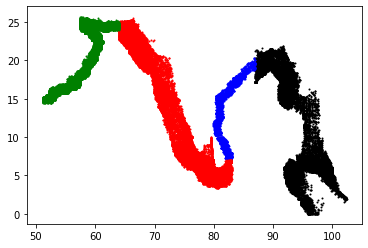

In [19]:
depth = '50_225'
pres = ds_WOD.pres
sal = ds_WOD['sal_' + depth]
temp = ds_WOD['temp_' + depth]
doxy = ds_WOD['doxy_' + depth]
doxy_pr = ds_WOD['doxy']
temp_pr = ds_WOD['temp']
sal_pr = ds_WOD['sal']
nitrate = ds_WOD['nitrate_' + depth]
phosphate = ds_WOD['phosphate_' + depth]

#############################################################
#----------------- Western Arabian Sea ---------------------#
#############################################################

ind_wAS = ((ds_WOD.lon <= bounds_wAS[1]) & (ds_WOD.lon >= bounds_wAS[0]) & 
              (ds_WOD.lat <= bounds_wAS[3]) & (ds_WOD.lat >= bounds_wAS[2]))

#subset gridded data
temp_wAS = temp[ind_wAS]
temp_pr_wAS = temp_pr[ind_wAS]
sal_wAS = sal[ind_wAS]
sal_pr_wAS = sal_pr[ind_wAS]
doxy_wAS = doxy[ind_wAS]
doxy_pr_wAS = doxy_pr[ind_wAS,:]
nitrate_wAS = nitrate[ind_wAS]
phosphate_wAS = phosphate[ind_wAS]
lat_wAS = ds_WOD.lat[ind_wAS]
lon_wAS = ds_WOD.lon[ind_wAS]
time_wAS = ds_WOD.time[ind_wAS]
mon_wAS = time_wAS.dt.month
mask_wAS = np.array(ds_mask.maskn_wod)[ind_wAS]
    
# convert to coastal
temp_wAS = temp_wAS[mask_wAS]
temp_pr_wAS = temp_pr_wAS[mask_wAS,:]
sal_wAS = sal_wAS[mask_wAS]
sal_pr_wAS = sal_pr_wAS[mask_wAS,:]
doxy_wAS = doxy_wAS[mask_wAS]
doxy_pr_wAS = doxy_pr_wAS[mask_wAS,:]
nitrate_wAS = nitrate_wAS[mask_wAS]
phosphate_wAS = phosphate_wAS[mask_wAS]
lat_wAS = lat_wAS[mask_wAS]
lon_wAS = lon_wAS[mask_wAS]
time_wAS = time_wAS[mask_wAS]
mon_wAS = mon_wAS[mask_wAS]

seas_wAS = np.full(mon_wAS.shape,0)
ind = (mon_wAS == 6) | (mon_wAS == 7) | (mon_wAS == 8) | (mon_wAS == 9) | (mon_wAS == 10)| (mon_wAS == 11)
seas_wAS[ind] = 1
#############################################################
#----------------- Eastern Arabian Sea ---------------------#
#############################################################

ind_eAS = ((ds_WOD.lon <= bounds_eAS[1]) & (ds_WOD.lon >= bounds_eAS[0]) & 
              (ds_WOD.lat <= bounds_eAS[3]) & (ds_WOD.lat >= bounds_eAS[2])) 
ind_eAS_SL = ((ds_WOD.lon < bounds_eAS_SL[1]) & (ds_WOD.lon > bounds_eAS_SL[0]) & 
              (ds_WOD.lat < bounds_eAS_SL[3]) & (ds_WOD.lat > bounds_eAS_SL[2])) 

#subset gridded data
temp_eAS = xr.concat((temp[ind_eAS],temp[ind_eAS_SL]), dim = 'time')
temp_pr_eAS = xr.concat((temp_pr[ind_eAS,:],temp_pr[ind_eAS_SL,:]), dim = 'time')
sal_eAS = xr.concat((sal[ind_eAS],sal[ind_eAS_SL]), dim = 'time')
sal_pr_eAS = xr.concat((sal_pr[ind_eAS,:],sal_pr[ind_eAS_SL,:]), dim = 'time')
doxy_eAS = xr.concat((doxy[ind_eAS],doxy[ind_eAS_SL]), dim = 'time')
doxy_pr_eAS = xr.concat((doxy_pr[ind_eAS,:],doxy_pr[ind_eAS_SL,:]), dim = 'time')
nitrate_eAS = xr.concat((nitrate[ind_eAS],nitrate[ind_eAS_SL]), dim = 'time')
phosphate_eAS = xr.concat((phosphate[ind_eAS],phosphate[ind_eAS_SL]), dim = 'time')
lat_eAS = xr.concat((ds_WOD.lat[ind_eAS],ds_WOD.lat[ind_eAS_SL]), dim = 'time')
lon_eAS = xr.concat((ds_WOD.lon[ind_eAS],ds_WOD.lon[ind_eAS_SL]), dim = 'time')
time_eAS = temp_eAS.time
mon_eAS = time_eAS.dt.month
mask_eAS = np.array(ds_mask.maskw_ro_wod)
mask_eAS = np.concatenate((mask_eAS[ind_eAS],mask_eAS[ind_eAS_SL]),0)

# temp_eAS = temp[ind_eAS]
# doxy_eAS = doxy[ind_eAS]
# nitrate_eAS = nitrate[ind_eAS]
# phosphate_eAS = phosphate[ind_eAS]
# lat_eAS = ds_WOD.lat[ind_eAS]
# lon_eAS = ds_WOD.lon[ind_eAS]
# time_eAS = ds_WOD.time[ind_eAS]
# mon_eAS = time_eAS.dt.month
# mask_eAS = np.array(ds_mask.maskw_ro_wod)[ind_eAS]
    
# convert to coastal
temp_eAS = temp_eAS[mask_eAS]
temp_pr_eAS = temp_pr_eAS[mask_eAS,:]
sal_eAS = sal_eAS[mask_eAS]
sal_pr_eAS = sal_pr_eAS[mask_eAS,:]
doxy_eAS = doxy_eAS[mask_eAS]
doxy_pr_eAS = doxy_pr_eAS[mask_eAS,:]
phosphate_eAS = phosphate_eAS[mask_eAS]
nitrate_eAS = nitrate_eAS[mask_eAS]
lat_eAS = lat_eAS[mask_eAS]
lon_eAS = lon_eAS[mask_eAS]
time_eAS = time_eAS[mask_eAS]
mon_eAS = mon_eAS[mask_eAS]

# sort by time
temp_eAS = temp_eAS.sortby(time_eAS)
temp_pr_eAS = temp_pr_eAS.sortby(time_eAS)
sal_eAS = sal_eAS.sortby(time_eAS)
sal_pr_eAS = sal_pr_eAS.sortby(time_eAS)
doxy_eAS = doxy_eAS.sortby(time_eAS)
doxy_pr_eAS = doxy_pr_eAS.sortby(time_eAS)
phosphate_eAS = phosphate_eAS.sortby(time_eAS)
nitrate_eAS = nitrate_eAS.sortby(time_eAS)
lat_eAS = lat_eAS.sortby(time_eAS)
lon_eAS = lon_eAS.sortby(time_eAS)
mon_eAS = mon_eAS.sortby(time_eAS)
time_eAS = time_eAS.sortby(time_eAS)

seas_eAS = np.full(mon_eAS.shape,0)
ind = (mon_eAS == 6) | (mon_eAS == 7) | (mon_eAS == 8) | (mon_eAS == 9) | (mon_eAS == 10)| (mon_eAS == 11)
seas_eAS[ind] = 1

#############################################################
#---------------- Western Bay of Bengal --------------------#
#############################################################

ind_wBoB = ((ds_WOD.lon <= bounds_wBoB[1]) & (ds_WOD.lon >= bounds_wBoB[0]) & 
               (ds_WOD.lat <= bounds_wBoB[3]) & (ds_WOD.lat >= bounds_wBoB[2])) 
ind_wBoB_SL = ((ds_WOD.lon < bounds_wBoB_SL[1]) & (ds_WOD.lon > bounds_wBoB_SL[0]) & 
              (ds_WOD.lat < bounds_wBoB_SL[3]) & (ds_WOD.lat > bounds_wBoB_SL[2])) 

#subset gridded data
temp_wBoB = xr.concat((temp[ind_wBoB],temp[ind_wBoB_SL]), dim = 'time')
temp_pr_wBoB = xr.concat((temp_pr[ind_wBoB,:],temp_pr[ind_wBoB_SL,:]), dim = 'time')
sal_wBoB = xr.concat((sal[ind_wBoB],sal[ind_wBoB_SL]), dim = 'time')
sal_pr_wBoB = xr.concat((sal_pr[ind_wBoB,:],sal_pr[ind_wBoB_SL,:]), dim = 'time')
doxy_wBoB = xr.concat((doxy[ind_wBoB],doxy[ind_wBoB_SL]), dim = 'time')
doxy_pr_wBoB = xr.concat((doxy_pr[ind_wBoB,:],doxy_pr[ind_wBoB_SL,:]), dim = 'time')
nitrate_wBoB = xr.concat((nitrate[ind_wBoB],nitrate[ind_wBoB_SL]), dim = 'time')
phosphate_wBoB = xr.concat((phosphate[ind_wBoB],phosphate[ind_wBoB_SL]), dim = 'time')
lat_wBoB = xr.concat((ds_WOD.lat[ind_wBoB],ds_WOD.lat[ind_wBoB_SL]), dim = 'time')
lon_wBoB = xr.concat((ds_WOD.lon[ind_wBoB],ds_WOD.lon[ind_wBoB_SL]), dim = 'time')
time_wBoB = temp_wBoB.time
mon_wBoB = time_wBoB.dt.month
mask_wBoB = np.array(ds_mask.maskn_wod)
mask_wBoB = np.concatenate((mask_wBoB[ind_wBoB],mask_wBoB[ind_wBoB_SL]),0)

# temp_wBoB = temp[ind_wBoB]
# doxy_wBoB = doxy[ind_wBoB]
# nitrate_wBoB = nitrate[ind_wBoB]
# phosphate_wBoB = phosphate[ind_wBoB]
# lat_wBoB = ds_WOD.lat[ind_wBoB]
# lon_wBoB = ds_WOD.lon[ind_wBoB]
# time_wBoB = ds_WOD.time[ind_wBoB]
# mon_wBoB = time_wBoB.dt.month
# mask_wBoB = np.array(ds_mask.maskn_wod)[ind_wBoB]
    
# convert to coastal
temp_wBoB = temp_wBoB[mask_wBoB]
temp_pr_wBoB = temp_pr_wBoB[mask_wBoB,:]
sal_wBoB = sal_wBoB[mask_wBoB]
sal_pr_wBoB = sal_pr_wBoB[mask_wBoB,:]
doxy_wBoB = doxy_wBoB[mask_wBoB]
doxy_pr_wBoB = doxy_pr_wBoB[mask_wBoB,:]
nitrate_wBoB = nitrate_wBoB[mask_wBoB]
phosphate_wBoB = phosphate_wBoB[mask_wBoB]
lat_wBoB = lat_wBoB[mask_wBoB]
lon_wBoB = lon_wBoB[mask_wBoB]
time_wBoB = time_wBoB[mask_wBoB]
mon_wBoB = mon_wBoB[mask_wBoB]

# sort by time
temp_wBoB = temp_wBoB.sortby(time_wBoB)
temp_pr_wBoB = temp_pr_wBoB.sortby(time_wBoB)
sal_wBoB = sal_wBoB.sortby(time_wBoB)
sal_pr_wBoB = sal_pr_wBoB.sortby(time_wBoB)
doxy_wBoB = doxy_wBoB.sortby(time_wBoB)
doxy_pr_wBoB = doxy_pr_wBoB.sortby(time_wBoB)
nitrate_wBoB = nitrate_wBoB.sortby(time_wBoB)
phosphate_wBoB = phosphate_wBoB.sortby(time_wBoB)
lat_wBoB = lat_wBoB.sortby(time_wBoB)
lon_wBoB = lon_wBoB.sortby(time_wBoB)
mon_wBoB = mon_wBoB.sortby(time_wBoB)
time_wBoB = time_wBoB.sortby(time_wBoB)

seas_wBoB = np.full(mon_wBoB.shape,0)
ind = (mon_wBoB == 6) | (mon_wBoB == 7) | (mon_wBoB == 8) | (mon_wBoB == 9) | (mon_wBoB == 10)| (mon_wBoB == 11)
seas_wBoB[ind] = 1

#############################################################
#---------------- Eastern Bay of Bengal --------------------#
#############################################################

ind_eBoB = ((ds_WOD.lon <= bounds_eBoB[1]) & (ds_WOD.lon >= bounds_eBoB[0]) & 
               (ds_WOD.lat <= bounds_eBoB[3]) & (ds_WOD.lat >= bounds_eBoB[2])) 

#subset gridded data
temp_eBoB = temp[ind_eBoB]
temp_pr_eBoB = temp_pr[ind_eBoB,:]
sal_eBoB = sal[ind_eBoB]
sal_pr_eBoB = sal_pr[ind_eBoB,:]
doxy_eBoB = doxy[ind_eBoB]
doxy_pr_eBoB = doxy_pr[ind_eBoB,:]
nitrate_eBoB = nitrate[ind_eBoB]
phosphate_eBoB = phosphate[ind_eBoB]
lat_eBoB = ds_WOD.lat[ind_eBoB]
lon_eBoB = ds_WOD.lon[ind_eBoB]
time_eBoB = ds_WOD.time[ind_eBoB]
mon_eBoB = time_eBoB.dt.month
mask_eBoB = np.array(ds_mask.maskw_ro_wod)[ind_eBoB]

# convert to coastal
temp_eBoB = temp_eBoB[mask_eBoB]
temp_pr_eBoB = temp_pr_eBoB[mask_eBoB,:]
sal_eBoB = sal_eBoB[mask_eBoB]
sal_pr_eBoB = sal_pr_eBoB[mask_eBoB,:]
doxy_eBoB = doxy_eBoB[mask_eBoB]
doxy_pr_eBoB = doxy_pr_eBoB[mask_eBoB,:]
nitrate_eBoB =  nitrate_eBoB[mask_eBoB]
phosphate_eBoB =  phosphate_eBoB[mask_eBoB]
lat_eBoB = lat_eBoB[mask_eBoB]
lon_eBoB = lon_eBoB[mask_eBoB]
time_eBoB = time_eBoB[mask_eBoB]
mon_eBoB = mon_eBoB[mask_eBoB]

seas_eBoB = np.full(mon_eBoB.shape,0)
ind = (mon_eBoB == 6) | (mon_eBoB == 7) | (mon_eBoB == 8) | (mon_eBoB == 9) | (mon_eBoB == 10)| (mon_eBoB == 11)
seas_eBoB[ind] = 1

#############################################################
#---------------------- Solubility -------------------------#
#############################################################

#seasonal 
O2_sat_wAS = o2sat(temp_wAS,sal_wAS)
O2_sat_eAS = o2sat(temp_eAS,sal_eAS)
O2_sat_wBoB = o2sat(temp_wBoB,sal_wBoB)
O2_sat_eBoB = o2sat(temp_eBoB,sal_eBoB)

#############################################################
#---------------------- Scatter --------------------------#
#############################################################
plt.scatter(lon_eBoB,lat_eBoB,color = 'k', s = 1)
plt.scatter(lon_wBoB,lat_wBoB,color = 'b', s = 1)
plt.scatter(lon_eAS,lat_eAS,color = 'r', s = 1)
plt.scatter(lon_wAS,lat_wAS,color = 'g', s = 1)

#############################################################
#---------------------- Save Data --------------------------#
#############################################################
ds_out['lat_wAS'] = xr.DataArray(lat_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['lon_wAS'] = xr.DataArray(lon_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['mon_wAS'] = xr.DataArray(mon_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['seas_wAS'] = xr.DataArray(seas_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['lat_eAS'] = xr.DataArray(lat_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['lon_eAS'] = xr.DataArray(lon_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['mon_eAS'] = xr.DataArray(mon_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['seas_eAS'] = xr.DataArray(seas_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['lat_wBoB'] = xr.DataArray(lat_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['lon_wBoB'] = xr.DataArray(lon_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['mon_wBoB'] = xr.DataArray(mon_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['seas_wBoB'] = xr.DataArray(seas_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['lat_eBoB'] = xr.DataArray(lat_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['lon_eBoB'] = xr.DataArray(lon_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['mon_eBoB'] = xr.DataArray(mon_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['seas_eBoB'] = xr.DataArray(seas_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])

# Western Arabian Sea
ds_out['temp_wAS'] = xr.DataArray(temp_pr_wAS,dims = ['time_wAS','pres'],coords =[time_wAS,pres])
ds_out['sal_wAS'] = xr.DataArray(sal_pr_wAS,dims = ['time_wAS','pres'],coords =[time_wAS,pres])
ds_out['doxy_wAS'] = xr.DataArray(doxy_pr_wAS,dims = ['time_wAS','pres'],coords =[time_wAS,pres])
ds_out['temp_wAS_' + depth] = xr.DataArray(temp_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['sal_wAS_' + depth] = xr.DataArray(sal_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['doxy_wAS_' + depth] = xr.DataArray(doxy_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['nitrate_wAS_' + depth] = xr.DataArray(nitrate_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['phosphate_wAS_' + depth] = xr.DataArray(phosphate_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['O2_sat_wAS_' + depth] = xr.DataArray(O2_sat_wAS,dims = ['time_wAS'],coords =[time_wAS])

# Eastern Arabian Sea
ds_out['temp_eAS'] = xr.DataArray(temp_pr_eAS,dims = ['time_eAS','pres'],coords =[time_eAS,pres])
ds_out['sal_eAS'] = xr.DataArray(sal_pr_eAS,dims = ['time_eAS','pres'],coords =[time_eAS,pres])
ds_out['doxy_eAS'] = xr.DataArray(doxy_pr_eAS,dims = ['time_eAS','pres'],coords =[time_eAS,pres])
ds_out['temp_eAS_' + depth] = xr.DataArray(temp_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['sal_eAS_' + depth] = xr.DataArray(sal_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['doxy_eAS_' + depth] = xr.DataArray(doxy_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['nitrate_eAS_' + depth] = xr.DataArray(nitrate_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['phosphate_eAS_' + depth] = xr.DataArray(phosphate_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['O2_sat_eAS_' + depth] = xr.DataArray(O2_sat_eAS,dims = ['time_eAS'],coords =[time_eAS])

# Western Bay of Bengal
ds_out['temp_wBoB'] = xr.DataArray(temp_pr_wBoB,dims = ['time_wBoB','pres'],coords =[time_wBoB,pres])
ds_out['sal_wBoB'] = xr.DataArray(sal_pr_wBoB,dims = ['time_wBoB','pres'],coords =[time_wBoB,pres])
ds_out['doxy_wBoB'] = xr.DataArray(doxy_pr_wBoB,dims = ['time_wBoB','pres'],coords =[time_wBoB,pres])
ds_out['temp_wBoB_' + depth] = xr.DataArray(temp_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['tsal_wBoB_' + depth] = xr.DataArray(sal_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['doxy_wBoB_' + depth] = xr.DataArray(doxy_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['nitrate_wBoB_' + depth] = xr.DataArray(nitrate_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['phosphate_wBoB_' + depth] = xr.DataArray(phosphate_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['O2_sat_wBoB_' + depth] = xr.DataArray(O2_sat_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])

# Eastern Bay of Bengal
ds_out['temp_eBoB'] = xr.DataArray(temp_pr_eBoB,dims = ['time_eBoB','pres'],coords =[time_eBoB,pres])
ds_out['sal_eBoB'] = xr.DataArray(sal_pr_eBoB,dims = ['time_eBoB','pres'],coords =[time_eBoB,pres])
ds_out['doxy_eBoB'] = xr.DataArray(doxy_pr_eBoB,dims = ['time_eBoB','pres'],coords =[time_eBoB,pres])
ds_out['temp_eBoB_' + depth] = xr.DataArray(temp_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['sal_eBoB_' + depth] = xr.DataArray(sal_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['doxy_eBoB_' + depth] = xr.DataArray(doxy_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['nitrate_eBoB_' + depth] = xr.DataArray(nitrate_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['phosphate_eBoB_' + depth] = xr.DataArray(phosphate_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['O2_sat_eBoB_' + depth] = xr.DataArray(O2_sat_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])



# Save Data

In [20]:
# delete if already present
if os.path.isfile(outfn):
    os.remove(outfn)

ds_out.to_netcdf(outfn,mode='w',format = "NETCDF4")
ds_out

<xarray.Dataset>
Dimensions:                (pres: 57, time_eAS: 23134, time_eBoB: 20710, time_wAS: 31230, time_wBoB: 2847)
Coordinates:
  * time_wAS               (time_wAS) datetime64[ns] 1948-06-12 ... 2020-05-23
  * time_eAS               (time_eAS) datetime64[ns] 1948-03-14 ... 2020-05-31
  * time_wBoB              (time_wBoB) datetime64[ns] 1951-04-20 ... 2020-05-28
  * time_eBoB              (time_eBoB) datetime64[ns] 1948-06-29 ... 2020-05-29
  * pres                   (pres) int64 0 5 10 15 20 ... 1350 1400 1450 1500
Data variables:
    lat_wAS                (time_wAS) float32 22.3 23.116667 ... 16.702 16.689
    lon_wAS                (time_wAS) float32 60.666668 59.75 ... 54.473 54.967
    mon_wAS                (time_wAS) int64 6 6 6 6 6 6 6 6 ... 4 4 4 4 4 5 5 5
    seas_wAS               (time_wAS) int64 1 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0 0
    lat_eAS                (time_eAS) float32 4.6 8.283334 ... 20.875845 15.705
    lon_eAS                (time_eAS) float32 82.6 73